In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv', usecols=['Age', 'EstimatedSalary', 'Purchased'])
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


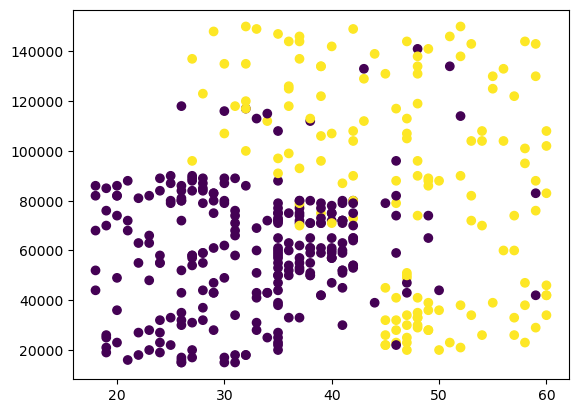

In [3]:
X = data.iloc[:, [0,1]].values
y = data.iloc[:, -1].values

plt.scatter(X[:, 0], X[:, 1], c=y)

In [10]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)
np.mean(cross_val_score(dt, X, y, scoring='f1', cv=10))

0.7712563341984922

# Tree visualization

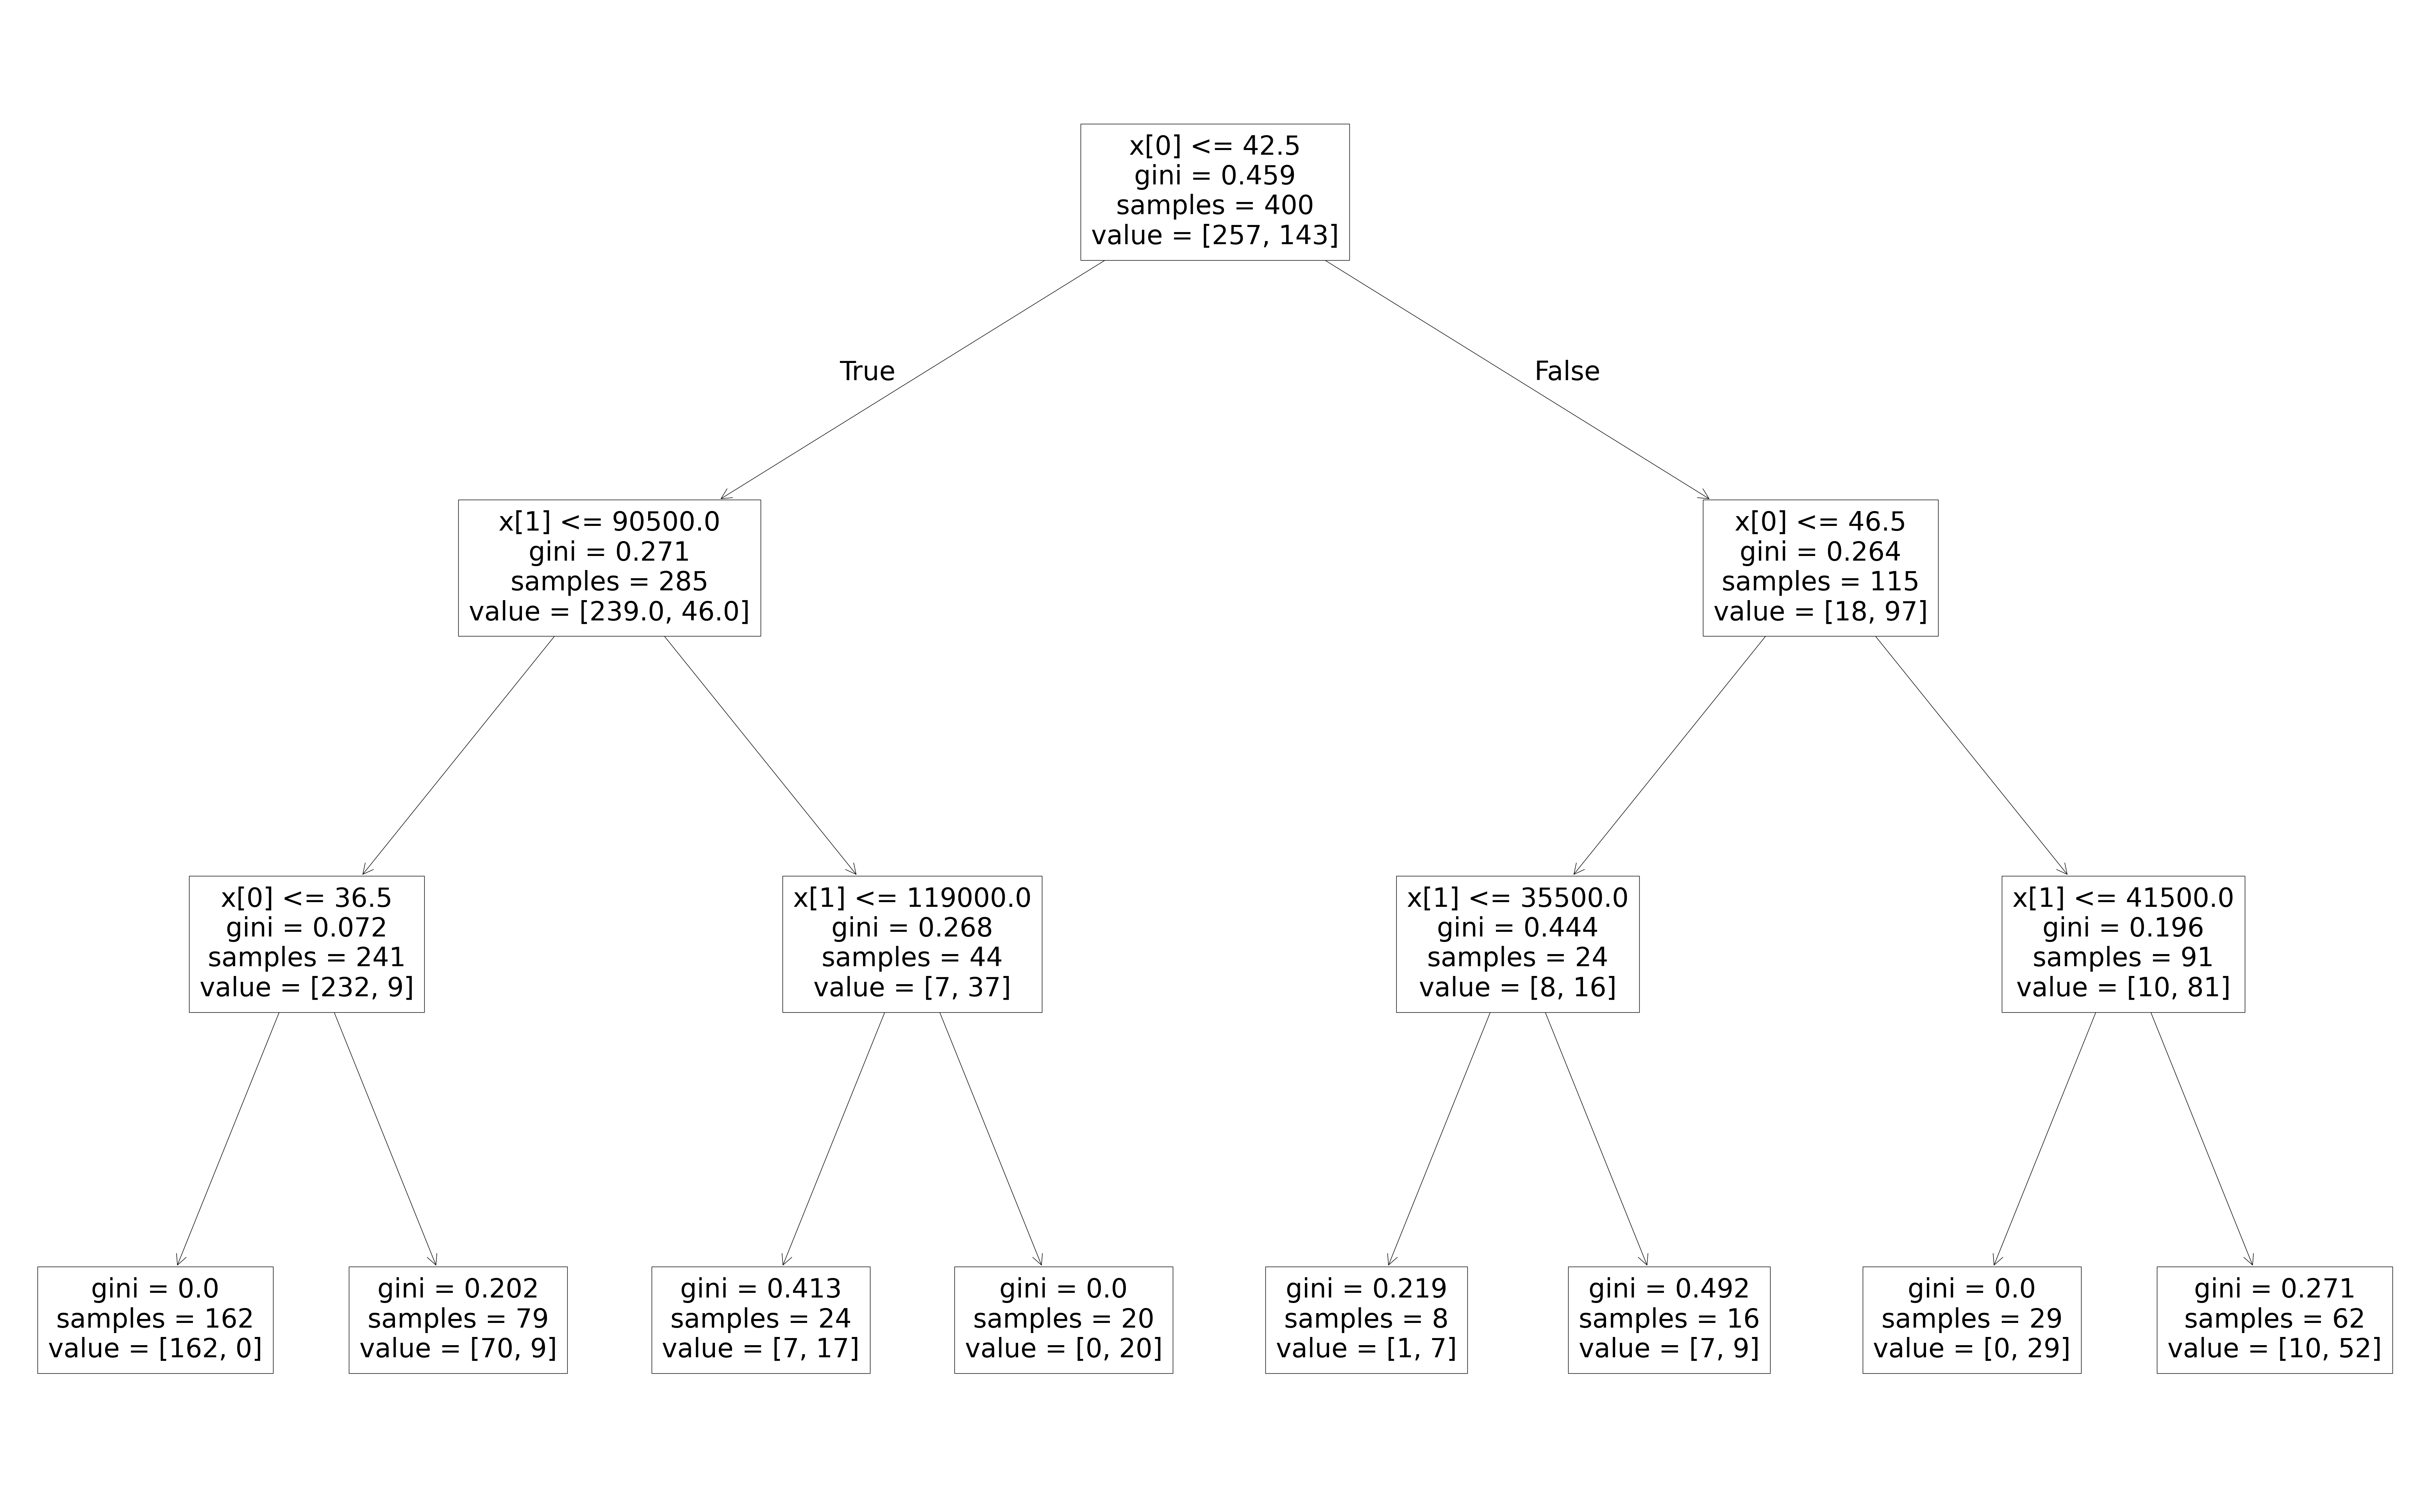

In [11]:
# visualizing the tree
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 80,50
plot_tree(dt)
plt.show()

In [16]:
# plotting

def plot_decision_regions(X, y, depth=None):
    x_ = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 500)
    y_ = np.linspace(min(X[:,1])-1, max(X[:,1])+1, 500)
    XX, YY = np.meshgrid(x_, y_)
    
    XY_plot = np.concatenate((XX.reshape(-1,1), YY.reshape(-1,1)), axis=1)   
    
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X, y)
    Z = dt.predict(XY_plot).reshape(XX.shape)

    fit, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    
    ax[0].contourf(XX, YY, Z)
    ax[0].scatter(X[:,0], X[:,1], c=y, cmap='binary')

    rcParams['figure.figsize'] = 80,50
    plot_tree(dt, ax=ax[1])

    print('Cross Val Score : ', np.mean(cross_val_score(dt, X, y, scoring='f1', cv=10)))

Cross Val Score :  0.7044958992620283


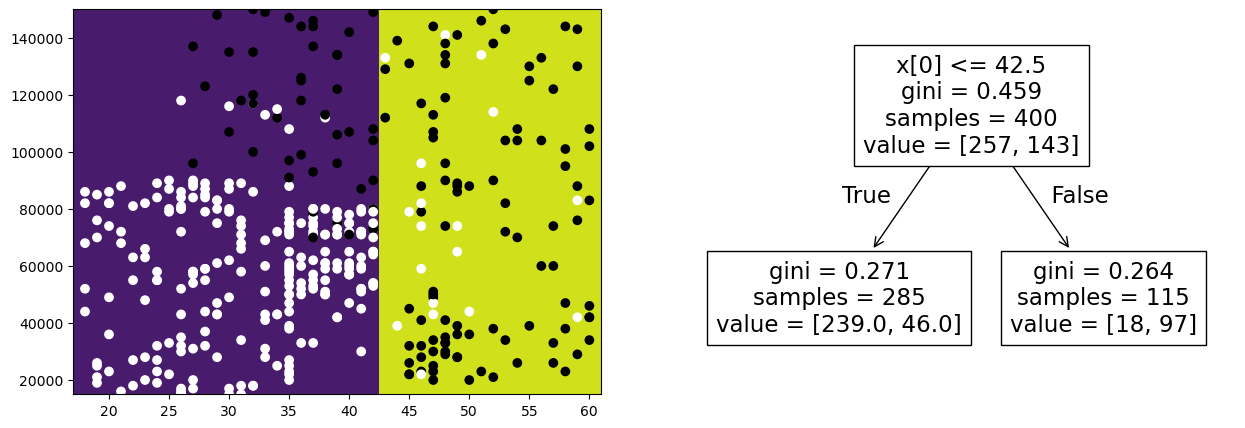

In [17]:
plot_decision_regions(X, y, 1)    # underfitting

Cross Val Score :  0.8683375467691373


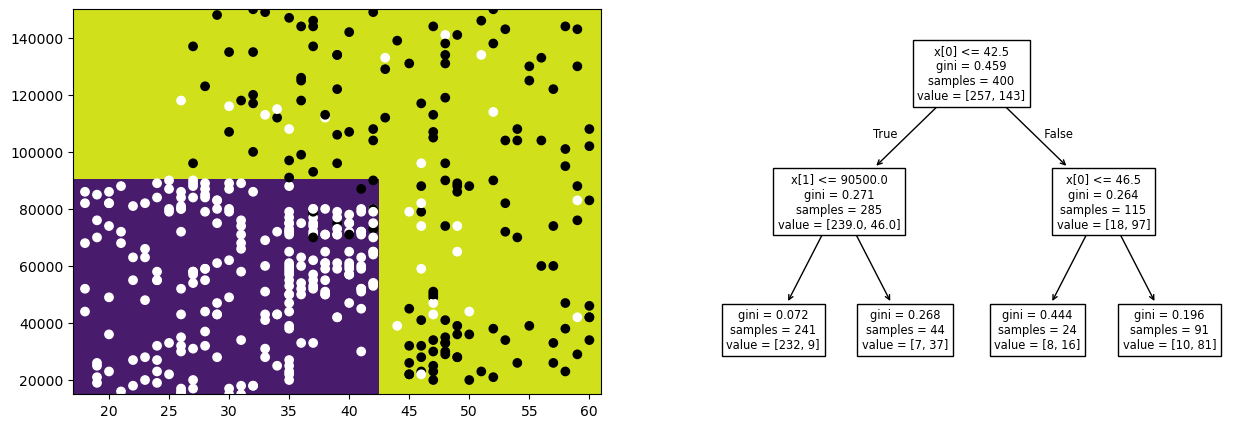

In [18]:
plot_decision_regions(X, y, 2)    # underfitting

Cross Val Score :  0.7567129038616802


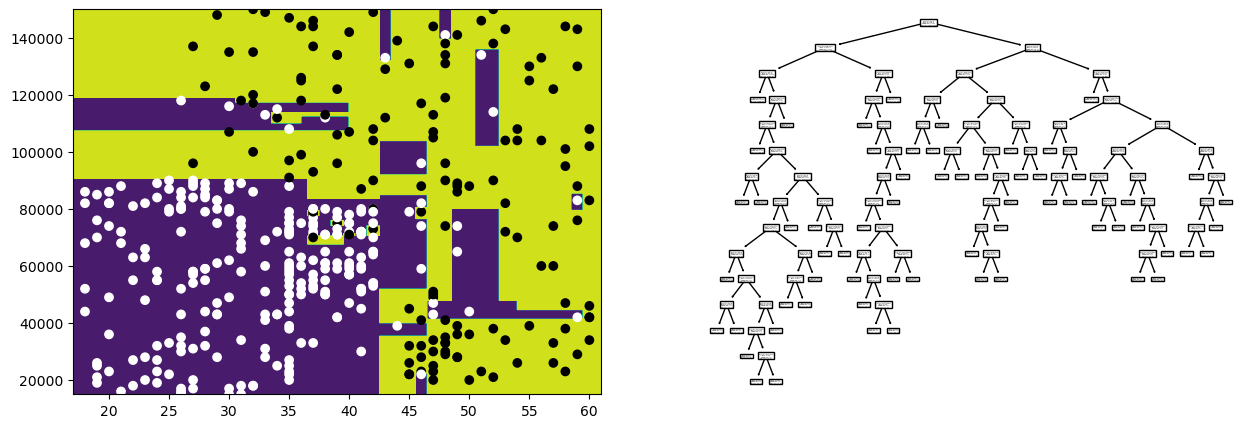

In [19]:
plot_decision_regions(X, y)     # Overfitting

Cross Val Score :  0.8139089706589706


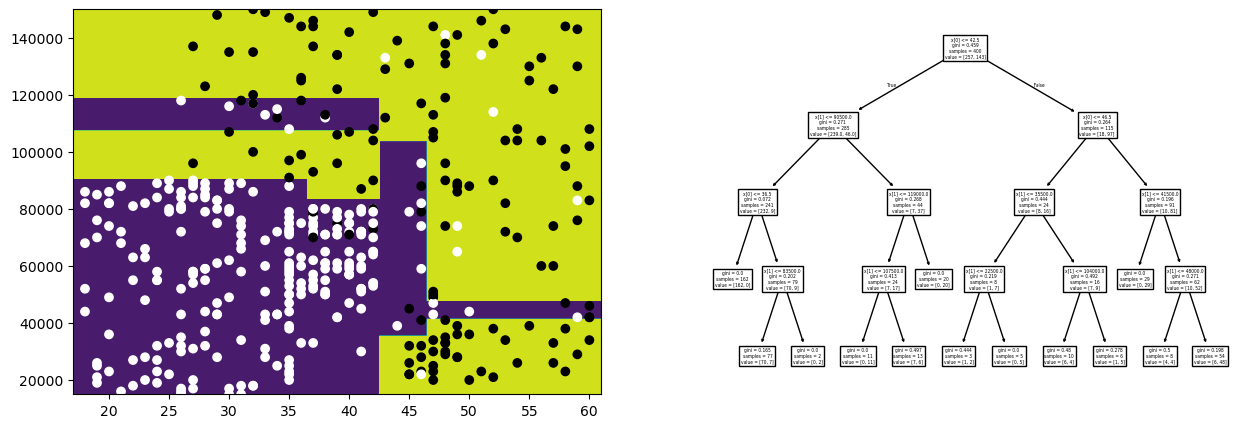

In [23]:
plot_decision_regions(X, y, 4)     # good fit

In [12]:
dt.n_classes_

2

In [13]:
dt.n_features_in_, dt.n_outputs_

(2, 1)

# Cross Validation

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'splitter' : ['best', 'random'],
    'max_depth' : [2,3,4,5],
    'min_samples_split' : list(range(2, 51, 10)),
    'min_samples_leaf' : list(range(1, 51, 10)),
    'min_impurity_decrease' : list(np.arange(0, 0.5, 0.1)),    # range can handle only integers
    'max_leaf_nodes' : [5, 10, 15],
    'max_features' : [1,2,3,4,5]    # only 2 columns present
}

model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy')
model.fit(X, y)

/usr/lib64/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [5, 10, 15],
                         'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                   0.30000000000000004, 0.4],
                         'min_samples_leaf': [1, 11, 21, 31, 41],
                         'min_samples_split': [2, 12, 22, 32, 42],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [16]:
model.best_params_

{'max_depth': 5,
 'max_features': 5,
 'max_leaf_nodes': 15,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 32,
 'splitter': 'random'}

In [17]:
model.best_score_

0.9174999999999999

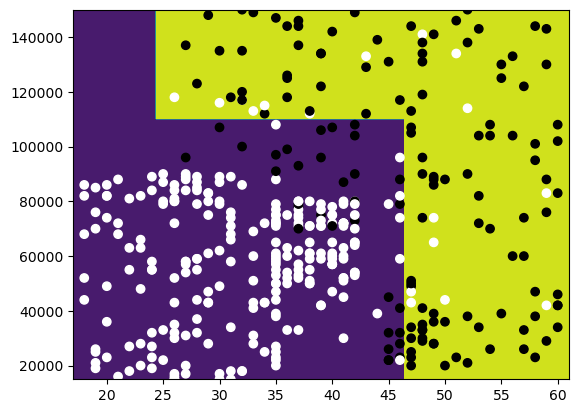

In [18]:
x_ = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 500)
y_ = np.linspace(min(X[:,1])-1, max(X[:,1])+1, 500)
XX, YY = np.meshgrid(x_, y_)
    
XY_plot = np.concatenate((XX.reshape(-1,1), YY.reshape(-1,1)), axis=1)

Z = model.predict(XY_plot).reshape(XX.shape)
    
plt.contourf(XX, YY, Z)
plt.scatter(X[:,0], X[:,1], c=y, cmap='binary')